> **1. Enregistrer les données dans un format adapté pour une lecture par la suite avec Python sachant que la première ligne du fichier correspond au noms des variables. Convertir la colonne date en type datetime et supprimer toutes les lignes ayant une valeur manquante.**

Vu que les données à charger sont externes à notre projet, nous allons l'importer en utilisant la bibliothèque urllib de Python

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', sep=';')
df.head()

,date,tests,cas,contact,importe,communautaire
0,02/03/2020,1.0,1,0,0,0
1,03/03/2020,2.0,1,0,1,0
2,04/03/2020,2.0,2,1,1,0
3,05/03/2020,NaN,0,0,0,0
4,06/03/2020,2.0,0,0,0,0


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,tests,cas,contact,importe,communautaire
0,2020-02-03,1.0,1,0,0,0
1,2020-03-03,2.0,1,0,1,0
2,2020-04-03,2.0,2,1,1,0
3,2020-05-03,NaN,0,0,0,0
4,2020-06-03,2.0,0,0,0,0


In [4]:
df.shape

(496, 6)

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.shape

(495, 6)

> **2. Ajouter dans les données une nouvelle variable proportion qui représente le taux de positivité journalier.**

In [7]:
df['proportion'] = round((df['cas'] / df['tests']), 3)

In [8]:
df.tail()

,date,tests,cas,contact,importe,communautaire,proportion
491,2021-07-07,2388.0,356,127,0,229,0.149
492,2021-08-07,2166.0,354,135,1,218,0.163
493,2021-09-07,2104.0,476,215,0,261,0.226
494,2021-10-07,2762.0,380,136,0,234,0.138
495,2021-11-07,2715.0,529,188,0,341,0.195


> **3. Ajouter dans les données une nouvelle variable total qui représente le nombre cumulé de cas positifs du début de la pandémie jusqu’à une certaine date.**

In [9]:
df['total'] = df['cas'].cumsum()

In [10]:
df.tail()

,date,tests,cas,contact,importe,communautaire,proportion,total
491,2021-07-07,2388.0,356,127,0,229,0.149,46489
492,2021-08-07,2166.0,354,135,1,218,0.163,46843
493,2021-09-07,2104.0,476,215,0,261,0.226,47319
494,2021-10-07,2762.0,380,136,0,234,0.138,47699
495,2021-11-07,2715.0,529,188,0,341,0.195,48228


> **4. Représenter les variables tests et cas en fonction de la date dans le même graphique. Ajouter une légende dans le graphique**

Importation du module `pyplot` de la bibliothèque `matplotlib`

In [11]:
import matplotlib.pyplot as plt
import numpy as np

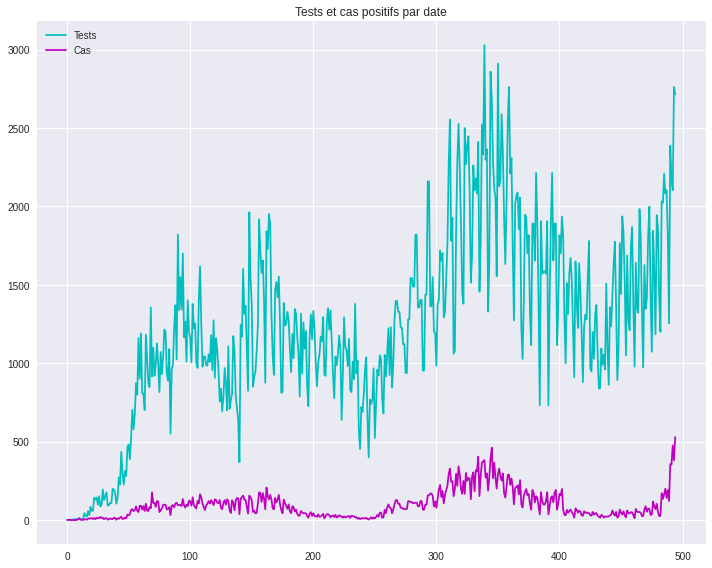

In [12]:
tests, cas, dates = df['tests'], df['cas'], df['date']
x_indexes = np.arange(len(dates))

plt.style.use('seaborn')
plt.figure(figsize=(10,8))

plt.plot(x_indexes, tests, color='c', label='Tests')
plt.plot(x_indexes, cas, color='m', label='Cas')

plt.legend(loc='upper left')
# plt.xticks(ticks=x_indexes, labels=dates)
plt.title('Tests et cas positifs par date')
plt.tight_layout() # tight_layout supprime l'espace perdu autour d'une figure
plt.show()

> **5. Représenter les variables communautaire et contact en fonction de la date dans le même gra-
phique. Ajouter une légende dans le graphique**

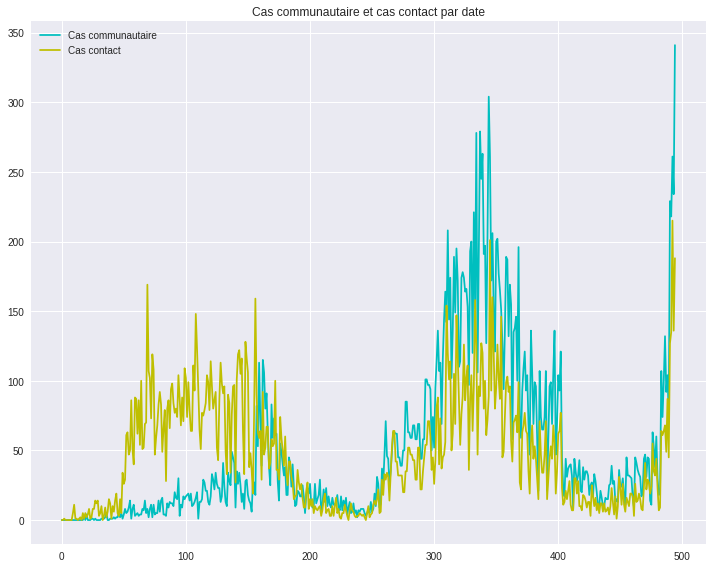

In [14]:
communautaires, contacts, dates = df['communautaire'], df['contact'], df['date']
x_indexes = np.arange(len(dates))

plt.style.use('seaborn')
plt.figure(figsize=(10,8))

plt.plot(x_indexes, communautaires, color='c', label='Cas communautaire')
plt.plot(x_indexes, contacts, color='y', label='Cas contact')

plt.legend(loc='upper left')
plt.title('Cas communautaire et cas contact par date')
# plt.xticks(ticks=x_indexes, labels=dates)
plt.tight_layout() # tight_layout supprime l'espace perdu autour d'une figure
plt.show()

> **6. Tracer le boxplot et l’histogramme de la variable cas. Conclure sur la présence ou non d’éven-
tuelles valeurs manquantes pour cette variable.**

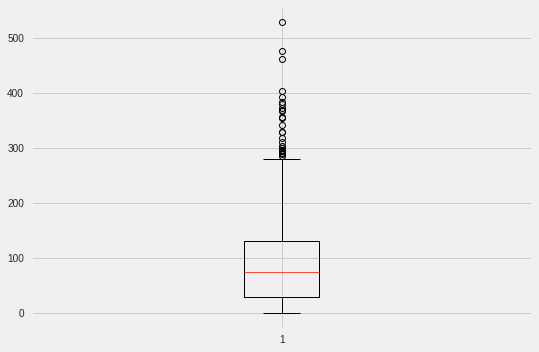

In [17]:
cas = df['cas']

plt.style.use('fivethirtyeight')

plt.boxplot(cas)
plt.show()

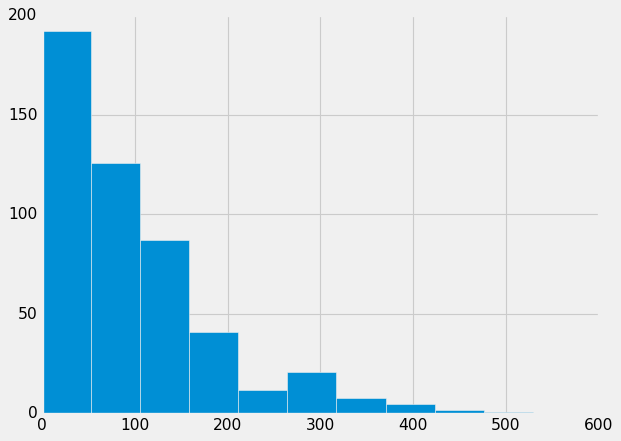

In [ ]:
cas = df['cas']

plt.style.use('fivethirtyeight')

plt.hist(cas)
plt.show()

> **7. Discrétisez la variable cas. Pour ce faire on ajoutera une variable dans le DataFrame des données une nouvelle variable nommée cas_classe. Cette variable aura 4 classes :**

<center>$[min(cas),Q1], ]Q1,Q2], ]Q2,Q3], ]Q3,max(cas)]$</center>

> Où $Q1$, $Q2$, $Q3$ sont respectivement les 3 premiers ***quantiles*** de la variable `cas`, $min(cas)$ et $max(cas)$ respectivement la plus petite et la plus grande valeur de la variable `cas`.

In [23]:
min_cas, max_cas = df['cas'].min(), df['cas'].max()
min_cas, max_cas

(0, 529)

In [24]:
Q1, Q2, Q3 = df['cas'].quantile([0.25, 0.5, 0.75])
Q1, Q2, Q3

(30.0, 74.0, 131.0)

In [25]:
df['cas'].describe()

count    495.000000
mean      97.430303
std       88.756243
min        0.000000
25%       30.000000
50%       74.000000
75%      131.000000
max      529.000000
Name: cas, dtype: float64